# **Exploratory Data Analysis**


In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


In [36]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plotting the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

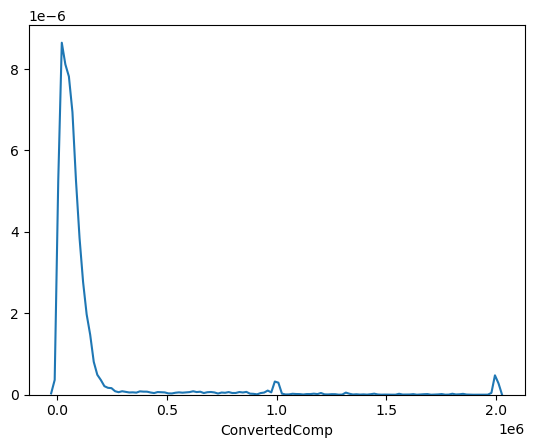

In [37]:
sns.distplot(df['ConvertedComp'], hist = False)

Plotting the histogram for the column `ConvertedComp`.


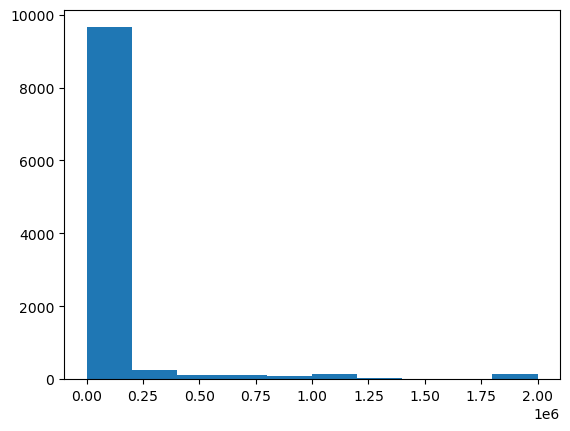

In [63]:
plt.hist(df['ConvertedComp'])
plt.show()

Calculating the median of the column `ConvertedComp`


In [39]:
df['ConvertedComp'].median()

57745.0

Identifying the total number of responders who identify themselves only as a **Man**


In [40]:
df.Gender.value_counts().Man

10480

Finding the median ConvertedComp of responders who identify themselves only as a **Woman**


In [49]:
df2 = df[['Gender', 'ConvertedComp']]
df2.drop(df2[df2['Gender'] != 'Woman'].index, inplace = True)
df2['ConvertedComp'].median()

57708.0

In [64]:
df.ConvertedComp[df.Gender == 'Woman'].median()

57708.0

In [55]:
df['Age'].median()

29.0

Five number summary of `Age`


In [65]:
df.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plotting a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

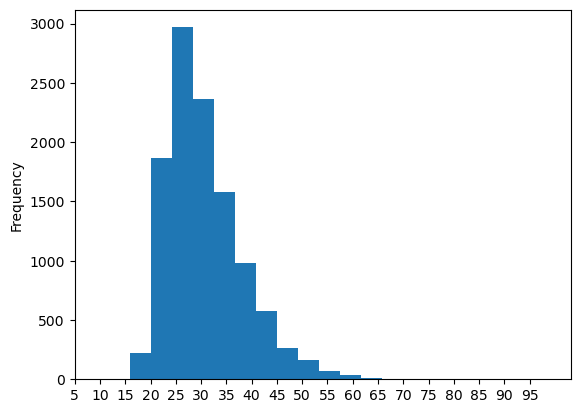

In [70]:
df.Age.plot(kind = 'hist',bins = 20, xticks = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])

<AxesSubplot:>

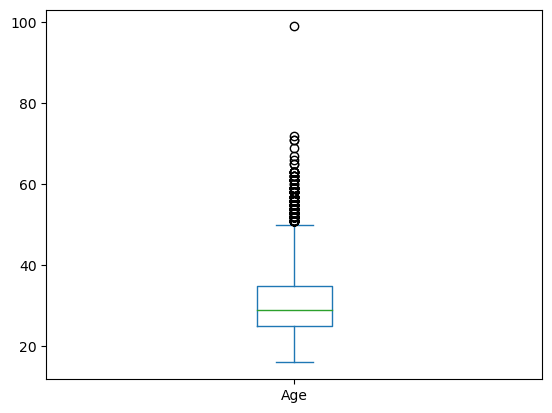

In [85]:
df.dropna()
df.Age.plot(kind= 'box')

### Finding outliers


Determining if outliers exist in the column `ConvertedComp` using a box plot


<AxesSubplot:>

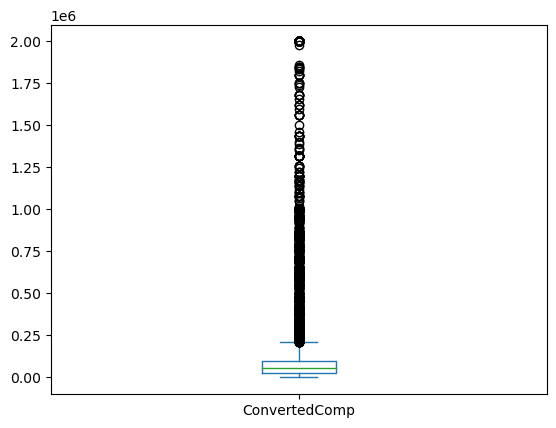

In [72]:
df.dropna()
df.ConvertedComp.plot(kind= 'box')

Finding the Inter Quartile Range for the column `ConvertedComp`.


In [74]:
df.ConvertedComp.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [79]:
IQR = df.ConvertedComp.describe()[6] - df.ConvertedComp.describe()[4]
IQR

73132.0

Calculating the upper and lower bounds.


In [80]:
whiskers = 1.5*IQR

Lower = df.ConvertedComp.describe()[4] - whiskers
Upper = df.ConvertedComp.describe()[6] + whiskers

print("Upper bound: {},  Lower bound: {}".format(Upper, Lower))

Upper bound: 209698.0,  Lower bound: -82830.0


Identifying how many outliers are there in the `ConvertedComp` column.


In [81]:
df[(df['ConvertedComp'] > Upper) | (df ['ConvertedComp'] < Lower)].shape

(879, 85)

Creating a new dataframe by removing the outliers from the `ConvertedComp` column.


In [82]:
df_cleaned = df[df.ConvertedComp <= Upper]
df_cleaned.ConvertedComp.describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

In [84]:
df_cleaned['ConvertedComp'].median()

52704.0

### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


In [83]:
df_cleaned.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
